### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import DataDuplicates,TrainTestFeatureDrift, FeatureLabelCorrelation

In [3]:
#load the data
titanic_data=pd.read_csv("C:\\Users\\saksh\\OneDrive\\Documents\\VIT\\placement\\projects\\train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape


(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing Values

In [7]:
# cabin has missing values----> drop it
titanic_data=titanic_data.drop(columns="Cabin",axis=1)

In [8]:
# replacing age column with mean value
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [9]:
# finding mode value of embarked column
titanic_data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [10]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

In [11]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [12]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data Visualization

In [14]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

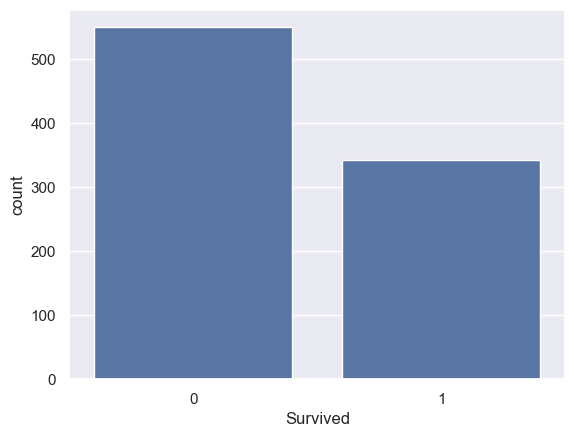

In [15]:
# count plot for "Survived" column
sns.countplot(x="Survived",data=titanic_data)


#(The error occurs because in Seaborn's countplot, the correct way to pass column names 
#is by using keyword arguments. You should pass the x parameter explicitly 
# rather than as a positional argument.)

In [16]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

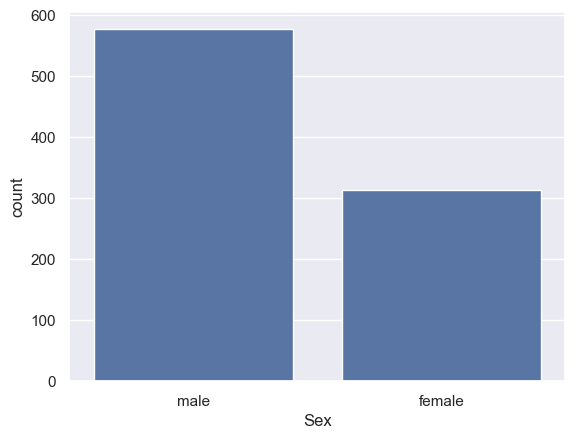

In [17]:
# count plot for "Sex" column
sns.countplot(x="Sex",data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

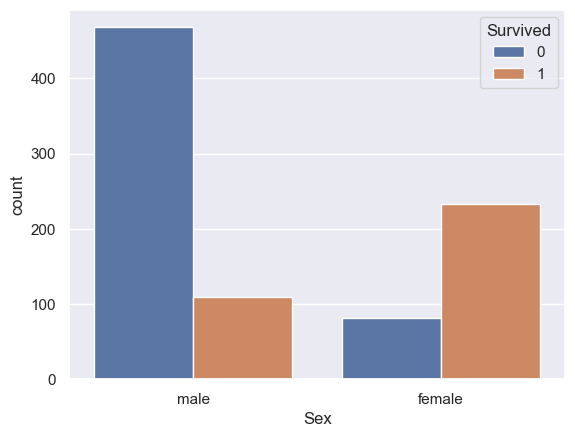

In [18]:
# number of survivors gender wise
sns.countplot(x="Sex",hue="Survived",data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

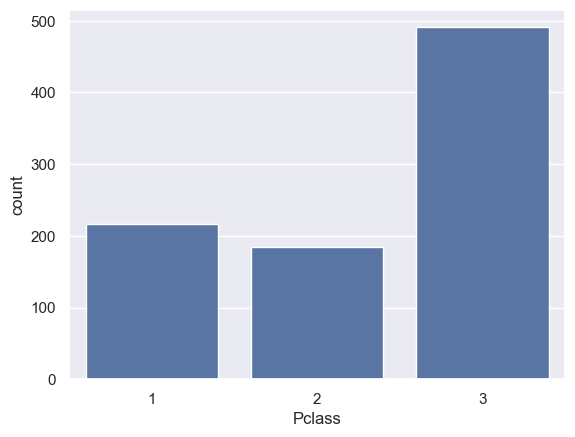

In [19]:
# making a countplot for Pclass column
sns.countplot(x="Pclass",data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

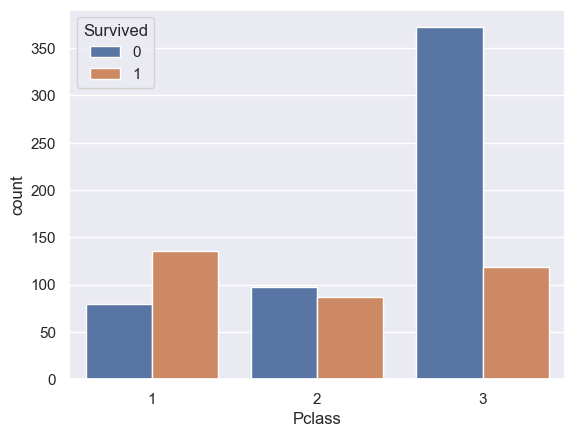

In [20]:
# number of survivors class wise
sns.countplot(x="Pclass",hue="Survived",data=titanic_data)

### Encoding the categorical variables

In [21]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [22]:
titanic_data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [23]:
titanic_data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [24]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#### Separating features and target

In [25]:
X=titanic_data.drop(columns=["PassengerId","Name","Ticket","Survived"])

Y=titanic_data["Survived"]

In [26]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [27]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#### Splitting data and training and testing

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)


(891, 7) (712, 7) (179, 7)


### Deepchecks validation

Deepchecks is a Python library designed to validate machine learning models and data. It helps you identify issues like data drift, feature-label correlations, and duplicates, making sure your model is built on reliable and consistent data.

Preparing Data for Deepchecks

Deepchecks requires datasets to be in the form of a Dataset object, which includes your features and labels. Here's how you prepare the training and testing datasets for validation:

In [30]:
# Creating Deepchecks Dataset objects for train and test sets
train_dataset = Dataset(X_train, label=Y_train, cat_features=['Sex', 'Embarked', 'Pclass'])
test_dataset = Dataset(X_test, label=Y_test, cat_features=['Sex', 'Embarked', 'Pclass'])


Running Data Validation Checks

Checking for Duplicates

The DataDuplicates check helps identify if there are duplicate rows in your training data, which could affect model performance.

In [31]:

# Run data validation checks
duplicates_check = DataDuplicates().run(train_dataset)

# Display check results
duplicates_check.show()

Checking for Train-Test Feature Drift

Feature drift occurs when the distribution of features changes between the training and testing datasets. This check ensures the features in both sets follow similar distributions.

In [32]:
train_test_feature_drift_result = TrainTestFeatureDrift().run(train_dataset, test_dataset)
train_test_feature_drift_result.show()

C:\Users\saksh\AppData\Local\Temp\ipykernel_21392\304157627.py:1: DeprecationWarning:

The TrainTestFeatureDrift check is deprecated and will be removed in the 0.14 version. Please use the FeatureDrift check instead



Checking Feature-Label Correlation

This check identifies any strong correlations between features and labels. High correlation can indicate a feature strongly influences the label, which is important to monitor for bias or leakage.

In [33]:
feature_label_correlation_result = FeatureLabelCorrelation().run(train_dataset)
feature_label_correlation_result.show()

### Model Training

#### Logistic Regression

In [34]:
model=LogisticRegression()

In [35]:
model.fit(X_train,Y_train)

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Model Evaluation

Accuracy Score

In [36]:
train_predict_1=model.predict(X_train)

In [37]:
print(train_predict_1)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [38]:
train_accuracy_1=accuracy_score(Y_train,train_predict_1)
print("Accuracy score of training data: ",train_accuracy_1)

Accuracy score of training data:  0.8075842696629213


In [39]:
#accuracy on test data
test_predict_1=model.predict(X_test)

In [40]:
print(test_predict_1)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [41]:
test_accuracy_1=accuracy_score(Y_test,test_predict_1)
print("Accuracy score of test data: ",test_accuracy_1)

Accuracy score of test data:  0.7821229050279329


Plotting confusion map

<Axes: >

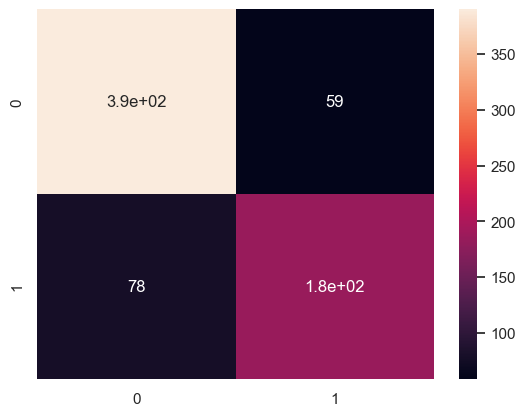

In [42]:
cm=confusion_matrix(Y_train,train_predict_1)
sns.heatmap(cm,annot=True)

<Axes: >

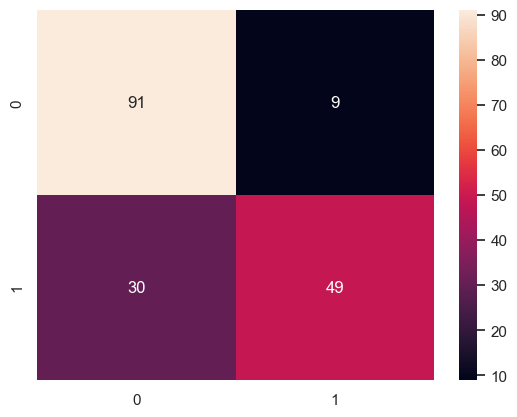

In [43]:
cm=confusion_matrix(Y_test,test_predict_1)
sns.heatmap(cm,annot=True)

Recall, precision, and F1 score 

In [44]:
# Calculate precision
precision1 = precision_score(Y_test, test_predict_1)
print("Precision:", precision1)

# Calculate recall (sensitivity)
recall1 = recall_score(Y_test, test_predict_1)
print("Recall (Sensitivity):", recall1)

# Calculate F1-score
f1_1 = f1_score(Y_test,test_predict_1)
print("F1-Score:", f1_1)

#(Accuracy, precision, and F1 score are calculated on the testing data, not the training data.)

Precision: 0.8448275862068966
Recall (Sensitivity): 0.620253164556962
F1-Score: 0.7153284671532847


#### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

Accuracy

In [46]:
train_predict_2= gnb.predict(X_train)
print(train_predict_2)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [47]:
train_accuracy_2= accuracy_score(Y_train, train_predict_2)
print("Accuracy on training set is: ",train_accuracy_2)

Accuracy on training set is:  0.7935393258426966


In [48]:
test_predict_2= gnb.predict(X_test)
print(test_predict_2)

[0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [49]:
test_accuracy_2= accuracy_score(Y_test, test_predict_2)
print("Accuracy on test set is: ",test_accuracy_2)


Accuracy on test set is:  0.7597765363128491


Plotting confusion maps

<Axes: >

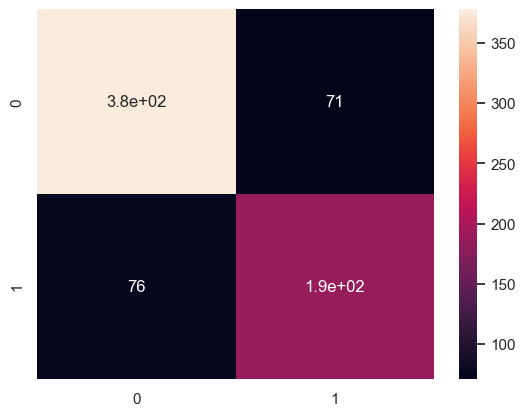

In [50]:
cm=confusion_matrix(Y_train,train_predict_2)
sns.heatmap(cm,annot=True)

<Axes: >

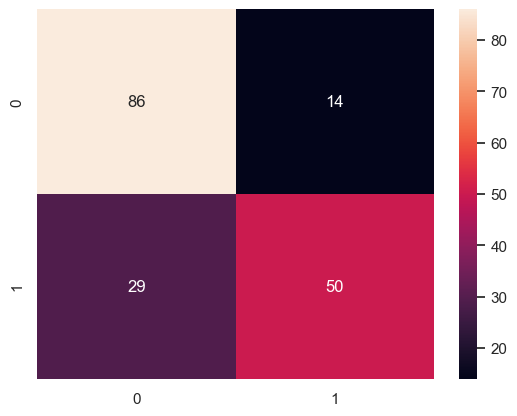

In [51]:
cm=confusion_matrix(Y_test,test_predict_2)
sns.heatmap(cm,annot=True)

Precision, Recall, F1 score

In [52]:
# Calculate precision
precision2= precision_score(Y_test, test_predict_2)
print("Precision:", precision2)

# Calculate recall (sensitivity)
recall2 = recall_score(Y_test, test_predict_2)
print("Recall (Sensitivity):", recall2)

# Calculate F1-score
f1_2 = f1_score(Y_test, test_predict_2)
print("F1-Score:", f1_2)

Precision: 0.78125
Recall (Sensitivity): 0.6329113924050633
F1-Score: 0.6993006993006993


#### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestClassifier()

Accuracy

In [54]:
train_predict_3= rf.predict(X_train)
print(train_predict_3)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [55]:
train_accuracy_3= accuracy_score(Y_train, train_predict_3)
print("Accuracy on training set is: ",train_accuracy_3)

Accuracy on training set is:  0.9859550561797753


In [56]:
test_predict_3= rf.predict(X_test)
print(test_predict_3)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [57]:
test_accuracy_3= accuracy_score(Y_test, test_predict_3)
print("Accuracy on test set is: ",test_accuracy_3)

Accuracy on test set is:  0.8044692737430168


Plotting confusion maps

<Axes: >

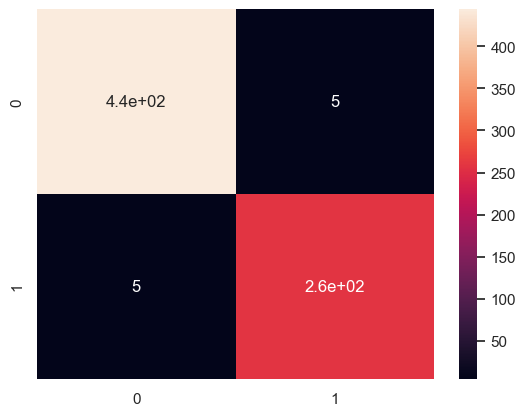

In [58]:
cm=confusion_matrix(Y_train,train_predict_3)
sns.heatmap(cm,annot=True)

<Axes: >

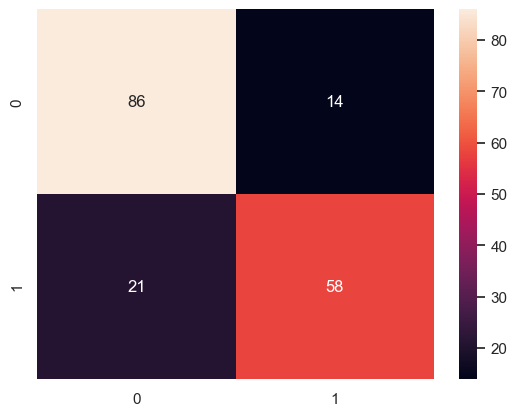

In [59]:
cm=confusion_matrix(Y_test,test_predict_3)
sns.heatmap(cm,annot=True)

Precision, Recall and F1 Score

In [60]:
# Calculate precision
precision3 = precision_score(Y_test, test_predict_3)
print("Precision:", precision3)

# Calculate recall (sensitivity)
recall3 = recall_score(Y_test, test_predict_3)
print("Recall (Sensitivity):", recall3)

# Calculate F1-score
f1_3 = f1_score(Y_test, test_predict_3)
print("F1-Score:", f1_3)

Precision: 0.8055555555555556
Recall (Sensitivity): 0.7341772151898734
F1-Score: 0.7682119205298013


### Model Comparison

In [61]:
print("Accuracy of Logistic Regression: ", test_accuracy_1)
print("Accuracy of Naive Bayes: ", test_accuracy_2)
print("Accuracy of Random Forest: ", test_accuracy_3)
print()

print("Recall of Logistic Regression: ", recall1)
print("Recall of Naive Bayes: ", recall2)
print("Recall of Random Forest: ", recall3)
print()

print("F1-score of Logistic Regression: ", f1_1)
print("F1-score of Naive Bayes: ", f1_2)
print("F1- score of Random Forest: ", f1_3)

Accuracy of Logistic Regression:  0.7821229050279329
Accuracy of Naive Bayes:  0.7597765363128491
Accuracy of Random Forest:  0.8044692737430168

Recall of Logistic Regression:  0.620253164556962
Recall of Naive Bayes:  0.6329113924050633
Recall of Random Forest:  0.7341772151898734

F1-score of Logistic Regression:  0.7153284671532847
F1-score of Naive Bayes:  0.6993006993006993
F1- score of Random Forest:  0.7682119205298013


### Pickle model saving

In [62]:
# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(gnb, file)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


### Deepchecks Model Validation

In [63]:
from deepchecks.tabular.suites import full_suite

# Run model validation suite
suite = full_suite()
suite.run(train_dataset, test_dataset, model).show()


c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\tabular\checks\train_test_validation\train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_ASW4H9WIQX03RN5IQ4TP32CNX">Full Suite</h1>\n<…

In [64]:
suite.run(train_dataset, test_dataset, gnb).show()

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 2 seconds
c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\tabular\checks\train_test_validation\train_test_sample

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_DZDG0BQP2GT0XN0PGRJDHCVZ1">Full Suite</h1>\n<…

In [65]:
suite.run(train_dataset, test_dataset, rf).show()

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\deepchecks\tabular\checks\train_test_validation\train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_A6UJBT5I343ZACYIMV4BMWWYU">Full Suite</h1>\n<…

In [66]:
from arize.pandas.logger import Client, Schema

API_KEY = '598b8202d45d6b65f70'
SPACE_KEY = 'c2f8f3b'
arize_client = Client(space_key=SPACE_KEY, api_key=API_KEY)

  arize.utils.logging | WARNING | The space_key parameter is deprecated and will be removed in a future release. Please use the space_id parameter instead.


In [67]:
import datetime
from arize.pandas.logger import Client
from arize.utils.types import ModelTypes, Environments, Schema, Metrics

# Define feature column names from your dataset
feature_column_names = [
    "Pclass",        # Class of Passenger
    "Name",          # Name of Passenger
    "Sex",           # Gender
    "Age",           # Age of passenger
    "SibSp",         # Siblings/Spouses
    "Parch",         # Parents/Children
    "Ticket",        # Ticket
    "Fare",          # Fare of Journey
    "Embarked"       # Picking Point
]

# Define schema
schema = Schema(
    prediction_id_column_name="PassengerId",        # Unique identifier for each prediction
    prediction_label_column_name="Survived",
    actual_label_column_name="Survived",             # Actual label column name (assuming binary classification)
    feature_column_names=feature_column_names,
   
)


In [68]:
df_arize=pd.read_csv('train.csv')
response = arize_client.log(
    dataframe=df_arize,
    schema=schema,
    model_id="titanic_survival_prediction",
    model_version="1.0.0",
    model_type=ModelTypes.BINARY_CLASSIFICATION,
    metrics_validation=[Metrics.CLASSIFICATION],
    validate=True,
    environment=Environments.PRODUCTION
)


  arize.utils.logging | INFO | Success! Check out your data at https://app.arize.com/organizations/QWNjb3VudE9yZ2FuaXphdGlvbjo5ODE5Omw4RmQ=/spaces/U3BhY2U6MTAzMzA6YnBWbA==/models/modelName/titanic_survival_prediction?selectedTab=performance
